In [1]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [4]:
!unzip -q archive.zip -d resume

In [21]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from docx import Document
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter

# Function to extract text from .docx files (resumes)
def extract_text_from_docx(file_path):
    doc = Document(file_path)
    text = ''
    for para in doc.paragraphs:
        text += para.text + "\n"  # Adding each paragraph's text to one string
    return text.strip()

# Function to process resumes and the job description
def process_resumes_and_job_description(resume_dir, job_description):
    resumes = []
    resume_files = []

    # Loop through all .docx files in the directory to get the resumes
    for filename in os.listdir(resume_dir):
        if filename.endswith('.docx'):  # Only process .docx files
            file_path = os.path.join(resume_dir, filename)
            resumes.append(extract_text_from_docx(file_path))  # Add resume text to list
            resume_files.append(filename)  # Keep track of the file names

    return resumes, resume_files

# Function to rank resumes based on similarity to the job description
def rank_resumes_by_similarity(resumes, resume_files, job_description):
    # Include job description in resumes list
    resumes.append(job_description)
    # Use TF-IDF Vectorizer to convert text into numbers
    vectorizer = TfidfVectorizer(stop_words='english')  # Remove common words like 'the', 'and'
    tfidf_matrix = vectorizer.fit_transform(resumes)  # Convert text to numbers

    # Calculate the cosine similarity between the job description and all resumes
    similarity_scores = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])  # Compare job description to resumes

    # Create a DataFrame to display the resumes and their similarity scores
    similarity_df = pd.DataFrame({
        'Resume': resume_files,  # Resume filenames
        'Similarity Score': similarity_scores.flatten()  # Similarity scores
    })

    # Sort the resumes by their similarity to the job description in descending order
    similarity_df = similarity_df.sort_values(by='Similarity Score', ascending=False)

    return similarity_df, similarity_scores.flatten()

# Function to assign labels based on similarity score
def assign_labels(similarity_scores, threshold=0.1):
    labels = []
    for score in similarity_scores:
        if score > threshold:
            labels.append(1)  # Relevant resume
        else:
            labels.append(0)  # Irrelevant resume
    return labels

# Function to train and evaluate the logistic regression model
# Function to train and evaluate the logistic regression model
def train_and_evaluate_model(resumes, labels):
    # Split the data into training and testing sets
    # Exclude the job description from the resumes list before splitting
    X_train, X_test, y_train, y_test = train_test_split(resumes[:-1], labels, test_size=0.2, random_state=42)
    # resumes[:-1] selects all elements except the last one (job description)

    # Convert resumes to feature vectors (TF-IDF)
    vectorizer = TfidfVectorizer(stop_words='english')
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Train a logistic regression model
    model = LogisticRegression(class_weight='balanced')
    model.fit(X_train_tfidf, y_train)

    # Evaluate the model
    accuracy = model.score(X_test_tfidf, y_test)
    print(f"Model Accuracy: {accuracy}")

    return model, X_test_tfidf, y_test
# Function to get shortlisted resumes based on model prediction
def get_shortlisted_resumes(model, X_test, resume_files, threshold=0.5):
    # Predict the labels for the test set
    predicted_labels = model.predict(X_test)

    # Get the resumes that are predicted to be relevant (label = 1)
    shortlisted_resumes = [resume_files[i] for i in range(len(predicted_labels)) if predicted_labels[i] == 1]

    return shortlisted_resumes

# Example job description (replace with actual job description in real use)
job_description = """
We are looking for a skilled Software Developer with experience in coding, testing, and deploying applications.
The ideal candidate should have expertise in programming languages such as Java, Python, or C++.
Experience with web development frameworks like Django, Flask, or React.js is highly preferred.
You should be familiar with version control systems like Git, and have experience working with databases (SQL or NoSQL).
Problem-solving skills, teamwork, and an ability to quickly learn new technologies are essential.
If you are passionate about technology and software development, we want you on our team!
"""

# Define the directory where resumes are stored (update with the correct path in Colab)
resume_dir = '/content/resume/Resumes'  # Change this path to your directory containing resumes

# Process the resumes and job description
resumes, resume_files = process_resumes_and_job_description(resume_dir, job_description)

# Rank the resumes by similarity to the job description
similarity_df, similarity_scores = rank_resumes_by_similarity(resumes, resume_files, job_description)

# Assign labels based on similarity scores (excluding the job description)
labels = assign_labels(similarity_scores)

# Train the model and evaluate it
model, X_test, y_test = train_and_evaluate_model(resumes, labels)

# Get shortlisted resumes based on model prediction
shortlisted_resumes = get_shortlisted_resumes(model, X_test, resume_files)

# Print the shortlisted resumes
print("\nShortlisted Resumes based on Model Prediction:")
for resume in shortlisted_resumes:
    print(resume)




Model Accuracy: 0.9333333333333333

Shortlisted Resumes based on Model Prediction:
Deepika Chintalapati.docx
Ravi Pattar- Sr. Agile Program manager.docx
Anudeep N_Sr Java Developer.docx
Pranay P.docx
Saiteja G.docx
Bharatha BA Resume.docx
Neha Mugghala.docx
CHETAN_Sr Java Developer.docx
B Suresh Kumar_Project Manager_1.docx
Nikith Reddy.docx
Tejaswi-resume.docx
Manohar B.docx
Yohan BSA.docx
Sravani Battu.docx
Drakshajavauidev.docx
jagadeesh k.docx
vema reddy.docx
Ramteja Motupalli.docx
Mohamad Jamil.docx
SaravanaKumar.docx
Mehul.docx
Priya B.docx
Shiva G-Java Resume.docx
Akhil_Sr BSA.docx
Gururaja Murthy PMCPCSM.docx
BA - Navneet.docx


<ipython-input-23-0d854fe47b34>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Shortlist_Probability', y='Resume', data=results_df, palette='Blues_d')


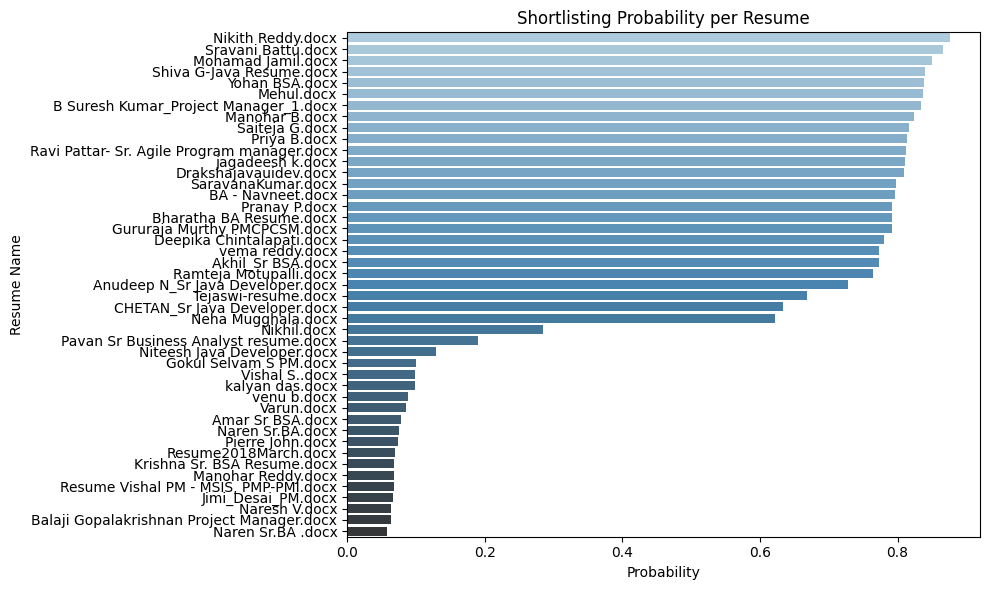

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get predicted probabilities
probs = model.predict_proba(X_test)[:, 1]  # Probabilities of class 1 (shortlisted)

# Create DataFrame with resume names and probabilities
# Instead of using X_test.index, use range(X_test.shape[0]) to get indices
results_df = pd.DataFrame({
    'Resume': [resume_files[i] for i in range(X_test.shape[0])],
    'Shortlist_Probability': probs
})

# Sort by probability
results_df = results_df.sort_values(by='Shortlist_Probability', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Shortlist_Probability', y='Resume', data=results_df, palette='Blues_d')
plt.title("Shortlisting Probability per Resume")
plt.xlabel("Probability")
plt.ylabel("Resume Name")
plt.tight_layout()
plt.show()
